In [1]:
import numpy as np

# Binning operator

In [ ]:
# From gfarm.ipmu.jp/~surhud/#hikage
official_bpw = np.array([346.8177,  474.8208,  647.5415,  883.6476, 1208.851 , 1651.568])

In [44]:
# From https://arxiv.org/pdf/1809.09148v1.pdf, after eq. 7 
# "We use 15 logarithmically equal bins in the range 60 ≤ ell ≤ 6500,
# although we restrict ourselves to a narrower range for our 
# cosmological inferences"

lmin = 60
lmax = 6500
nbpw = 15 # so that there are 15 bins
edges = np.logspace(np.log10(lmin), np.log10(lmax), nbpw + 1)
print('bpw edges')
print(edges)

print()

edges = np.round(edges)
print('bpw edges rounded')
print(edges)
print()

# binning is done by P_bl = \sum_{l\in b} (2*l + 1) * l^2
weights = []
ell_eff = []
window = np.zeros((nbpw, lmax+1))

i = 0
for ilmin, ilmax in zip(edges[:-1], edges[1:]):
    ells = np.arange(ilmin, ilmax)
    norm = np.sum((2*ells + 1) * ells**2)
    wi = (2*ells + 1) * ells**2 / norm
    weights.append(wi)
    ell_eff.append(np.sum(wi * ells))
    window[i, int(ilmin): int(ilmax)] = weights[i]
    i += 1
    
weights = np.array(weights)
ell_eff = np.array(ell_eff)

print('ell_eff')
print(ell_eff)
print()

print('ell_eff official')
print(official_bpw)

print()
print('Relative difference with the official effective ells')
print(ell_eff[5:11] / official_bpw - 1)

# Check window function
assert np.all(np.abs(window.dot(np.arange(6501)) / ell_eff -1) < 1e-10)

bpw edges
[  60.           81.99777301  112.06057964  153.14529954  209.29289182
  286.0258506   390.89137953  534.20371017  730.05857611  997.71962346
 1363.51312017 1863.41732204 2546.60117656 3480.26042033 4756.22673262
 6500.        ]

bpw edges rounded
[  60.   82.  112.  153.  209.  286.  391.  534.  730.  998. 1364. 1863.
 2547. 3480. 4756. 6500.]

ell_eff
[  72.17644878   98.7813114   135.11811318  184.75672015  252.88234543
  345.99639543  472.85411855  646.41794891  883.89918236 1208.33192308
 1650.86748242 2256.55547952 3083.87117898 4214.49898601 5760.08092787]

ell_eff official
[ 346.8177  474.8208  647.5415  883.6476 1208.851  1651.568 ]

Relative difference with the official effective ells
[-0.00236812 -0.00414194 -0.0017351   0.00028471 -0.0004294  -0.00042415]


/tmp/ipykernel_225899/1810414613.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(weights)


In [52]:
# From https://arxiv.org/pdf/1809.09148v1.pdf, after eq. 7 
# "We use 15 logarithmically equal bins in the range 60 ≤ ell ≤ 6500,
# although we restrict ourselves to a narrower range for our 
# cosmological inferences"

def get_HSC_binning(lmin=60, lmax=6500, nbpw=15):
    edges = np.logspace(np.log10(lmin), np.log10(lmax), nbpw + 1)
    edges = np.round(edges)

    # binning is done by P_bl = \sum_{l\in b} (2*l + 1) * l^2
    ell_eff = np.zeros(nbpw)
    window = np.zeros((nbpw, lmax+1))

    i = 0
    for ilmin, ilmax in zip(edges[:-1], edges[1:]):
        ells = np.arange(ilmin, ilmax)
        norm = np.sum((2*ells + 1) * ells**2)
        wi = (2*ells + 1) * ells**2 / norm
        ell_eff[i] = np.sum(wi * ells)
        window[i, int(ilmin): int(ilmax)] = wi
        i += 1

    # Check window function
    assert np.all(np.abs(window.dot(np.arange(6501)) / ell_eff -1) < 1e-10)

    return ell_eff, window

# Check that the ell_eff are close (<1%) to the official ones
ell_eff, window = get_HSC_binning()
assert np.all(np.abs(ell_eff[5:11] / official_bpw - 1) < 1e-2)

# Nz binning

In [34]:
import sys
sys.path.append('/mnt/zfsusers/gravityls_3/codes/xCell/')
import xcell
import yaml
from matplotlib import pyplot as plt
import sacc

In [3]:
dndz_Hamana = np.loadtxt('../HSC_official_Hamana2020/hsc16a_cstpcf_h2020.pz', unpack=True)
z_Hamana = dndz_Hamana[0]

In [13]:
with open('/mnt/extraspace/damonge/Datasets/HSC_DR1/map_shear_0.yml', 'r') as f:
    config = yaml.safe_load(f)
    
config['nside'] = 64
config['coords'] = 'G'
config['nbin_nz'] = 299
dz = (z_Hamana[1] - z_Hamana[0]) / 2
config['zlim_nz'] = [z_Hamana.min() - dz, z_Hamana.max() + dz] 

m = xcell.mappers.MapperHSCDR1wl(config)
z, nz = m.get_nz()
nz /= np.sum(nz * (z[1] - z[0]))  # Normalize it

Computing nz


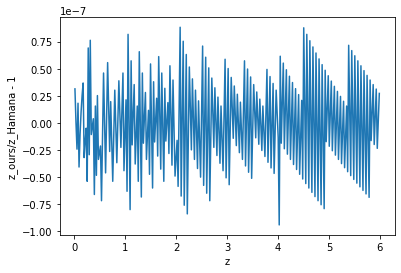

In [28]:
# Check z's are the same (zmean)
plt.plot(z, z_Hamana/z - 1)
plt.xlabel('z')
plt.ylabel('z_ours/z_Hamana - 1')
plt.show()
plt.close()

Computing nz


/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Computing nz


/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Computing nz


/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Computing nz


/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


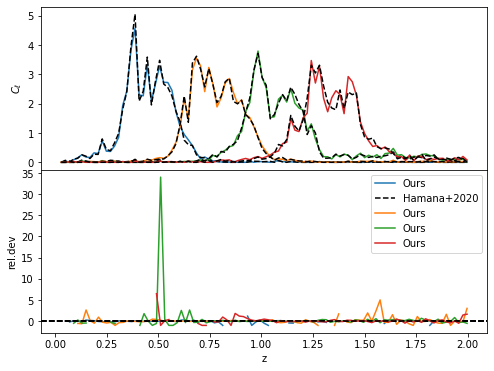

In [32]:
# Check Nz
f, ax = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'hspace':0})

for i in range(4):
    with open(f'/mnt/extraspace/damonge/Datasets/HSC_DR1/map_shear_{i}.yml', 'r') as f:
        config = yaml.safe_load(f)
    
    config['nside'] = 64
    config['coords'] = 'G'
    config['nbin_nz'] = 299
    dz = (z_Hamana[1] - z_Hamana[0]) / 2
    config['zlim_nz'] = [z_Hamana.min() - dz, z_Hamana.max() + dz]  # This is the default

    m = xcell.mappers.MapperHSCDR1wl(config)
    z, nz = m.get_nz()
    nz /= np.sum(nz * (z[1] - z[0])) # It should be already normalized but it seems it isn't
    
    # Check the dndz are the same

    sel = z < 2

    ax[0].plot(z[sel], nz[sel], label='Ours')
    ax[0].plot(z_Hamana[sel], dndz_Hamana[i+1, sel], 'k--', label='Hamana+2020')
    ax[1].plot(z[sel], nz[sel] / dndz_Hamana[i+1, sel] -1, label='Ours')
    ax[1].axhline(0, ls='--', color='k', label='Hamana+2020' if i == 0 else '')
ax[0].set_ylabel(r'$C_\ell$')
ax[0].set_xlabel(r'$\ell$')
ax[1].set_ylabel(r'rel.dev')
ax[1].set_xlabel('z')
ax[1].legend(loc=0)
plt.show()
plt.close()

/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


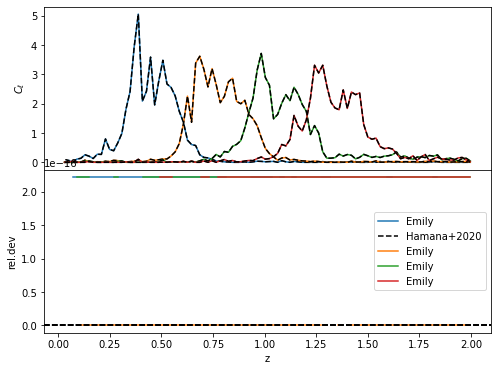

In [40]:
# Check that Emily uses Hamana+2020
f, ax = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'hspace':0})

for i in range(4):
    s = sacc.Sacc.load_fits('../summary_statistics_real_raw_hsc_Emily_paper_2208.07179.sacc')
    tr = s.tracers[f'source_{i+1}']
    z, nz = tr.z, tr.nz
    nz /= np.sum(nz * (z[1] - z[0])) # It should be already normalized but it seems it isn't
    
    # Check the dndz are the same

    sel = z < 2

    ax[0].plot(z[sel], nz[sel])
    ax[0].plot(z_Hamana[sel], dndz_Hamana[i+1, sel], 'k--')
    ax[1].plot(z[sel], nz[sel] / dndz_Hamana[i+1, sel] -1, label='Emily')
    ax[1].axhline(0, ls='--', color='k', label='Hamana+2020' if i == 0 else '')
ax[0].set_ylabel(r'$C_\ell$')
ax[0].set_xlabel(r'$\ell$')
ax[1].set_ylabel(r'rel.dev')
ax[1].set_xlabel('z')
ax[1].legend(loc=0)
plt.show()
plt.close()